### TITANIC URVAVEL PREDICTION WITH KERAS

<img src='https://miro.medium.com/v2/resize:fit:1400/1*iOCbIdKMy2I2sUsNBMES5Q.jpeg'>

* Bu projede, Titanik gemisinin batması sonrasında sağ kurtulan yolcuları tahmin etmeyi amaçlıyoruz. Öncelikle, Titanik datasetinin train verilerini kullanarak bir Keras modeli oluşturacağız. Bu aşamada modelin performansını artırmak için, yolcuların cinsiyet, sınıf, yaş gibi özelliklerine feature engineering yapacağız.

* Daha sonra, eğitilmiş modelimizi test verileri üzerinde test edeceğiz. Bu sayede, hayatta kalma olasılığı yüksek olan yolcuları tahmin etmeye çalışacağız. Sonuç olarak, bu proje kapsamında Titanik kazasından sağ kurtulanları öngörebilmek için kapsamlı bir veri analizi ve derin öğrenme yapacağız.

### EDA

In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv('train.csv')

In [3]:
df1.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df1.shape

(891, 12)

In [5]:
df2=pd.read_csv('test.csv')

In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df2.shape

(418, 11)

In [9]:
df=pd.concat([df1,df2])


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].median(),df['Fare'].std()

(33.29547928134557, 512.3292, 0.0, 14.4542, 51.75866823917414)

In [14]:
df['Fare']=df['Fare'].fillna(df['Fare'].mean()) # fillna bosluklari ortalamayla doldurur

In [16]:
import seaborn as sns

<Axes: xlabel='Embarked', ylabel='count'>

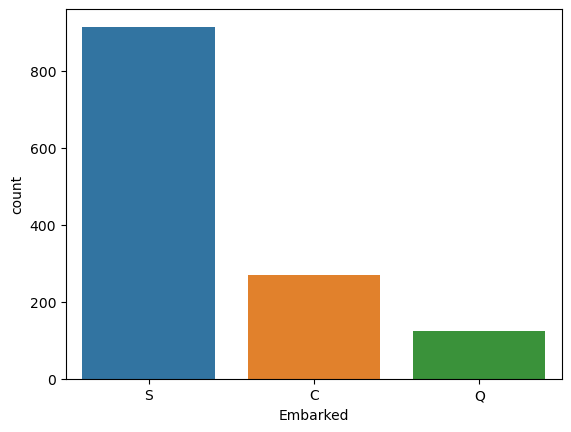

In [17]:
sns.countplot(x=df['Embarked'])  #Hangi lmandan ne kadar yolcu aldığının görseli
                

In [18]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [19]:
df['Embarked']=df['Embarked'].fillna('Q')

<Axes: xlabel='Embarked', ylabel='count'>

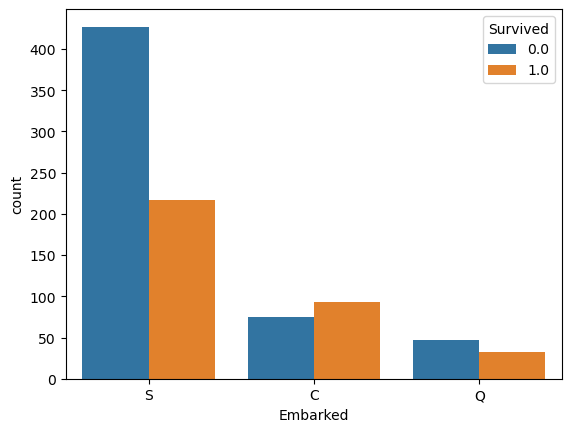

In [20]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])

In [22]:
df.shape

(1309, 12)

In [23]:
# del df # bir defa çalıştır  

In [24]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [25]:
df.sample(5) # rasgele 5 satır

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
382,1274,NaN,3,"Risien, Mrs. Samuel (Emma)",female,NaN,0,0,364498,14.5000,NaN,S
487,488,0.0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C
305,1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
326,327,0.0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


In [27]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True) #ilk boşluğu buldu noktaya kadar gidip arasındaki harfleri aldı
# string sözel veri demek

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
df['Title'].value_counts() 

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [30]:
df['Title']=df['Title'].replace(['Ms','Mll'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Donna'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Jonkheer','Don','Sir','Major','Capt','Col'],'Mr')

In [31]:
del df['Name']

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [33]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [34]:
df[df['Age']>18]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
407,1299,NaN,1,male,50.0,1,1,113503,211.5000,C80,C,Mr
411,1303,NaN,1,female,37.0,1,0,19928,90.0000,C78,Q,Mrs
412,1304,NaN,3,female,28.0,0,0,347086,7.7750,NaN,S,Miss
414,1306,NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C,Dona


In [35]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Title', ylabel='count'>

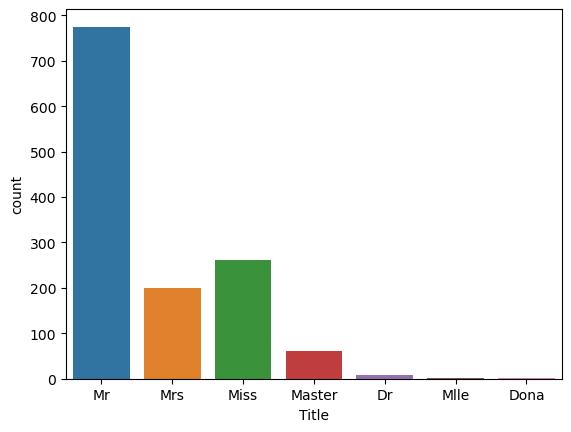

In [36]:
sns.countplot(x=df['Title'])

In [37]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [38]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [39]:
df.groupby('Title')['Age'].median()

Title
Dona      39.0
Dr        49.0
Master     4.0
Miss      22.0
Mlle      24.0
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

<Axes: xlabel='Title', ylabel='count'>

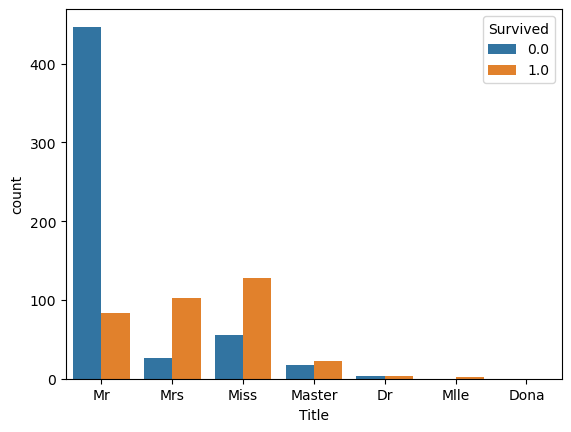

In [40]:
sns.countplot(x=df['Title'], hue=df['Survived'])

In [41]:
df['Family']=df['SibSp']+df['Parch']+1   #aile bireyleri sayısını topladık

In [42]:
del df['PassengerId']
del df['Ticket']

In [43]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.25,NaN,S,Mr,2


In [44]:
data=pd.get_dummies(df,drop_first=True)

In [45]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Cabin_A11,Cabin_A14,...,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
train=data[:891]
test=data[891:]

In [47]:
x=train.drop('Survived', axis=1)
y=train['Survived']

In [50]:
del test ['Survived']

##  DEEP LEARNING

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [55]:
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #mutlaka 1 olmalı
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [65]:
history=model.fit(x,y,epochs=500,batch_size=50,validation_split=.20,verbose=0) 

In [58]:
score=model.evaluate(x,y)

28/28 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.9012


In [66]:
import matplotlib.pyplot as plt

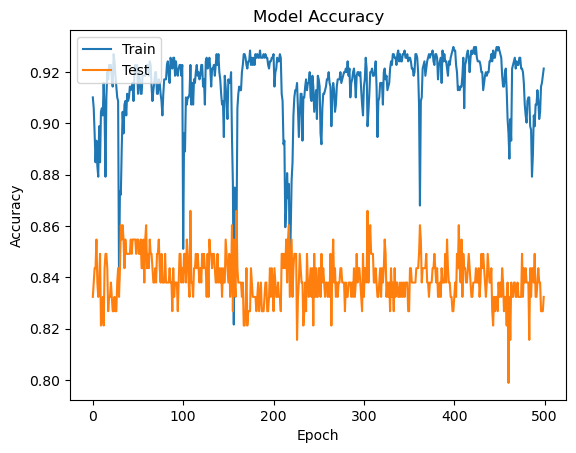

In [67]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

* Bu grafikte modelin train ve test verilerinin eğitim boyunca nasıl değiştiğini gösterir, birbirine yakın seyretmeleri idealdir.

* Sonuç olarak, deep learning modeli %90,12'lik doğruluk oranı başarılı bir performans sergiledi ve Titanik yolcularının hayatta kalma durumlarını tahmin etmek için iyi bir model oluşturduğunu söyleyebiliriz.